In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('new_test_Data.csv')
data.head()

,Crop,State,Cost_Production - 2013-14,Cost_Production - 2014-15,Cost_Production - 2015-16,Cost_Production - 2016-17,Cost_Production - 2017-18
0,Arhar,Andhra Pradesh,3354.14,4484.58,5233.87,4442.21,3695.29
1,Arhar,Bihar,649.35,NaN,NaN,NaN,1517.13
2,Arhar,Chhattisgarh,NaN,NaN,NaN,NaN,3842.54
3,Arhar,Gujarat,2875.65,3531.23,3171.14,2500.02,3269.03
4,Arhar,Karnataka,1704.49,2772.47,5017.97,1888.92,2825.77


##### Basic Information about dataset:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop                       209 non-null    object 
 1   State                      209 non-null    object 
 2   Cost_Production - 2013-14  153 non-null    float64
 3   Cost_Production - 2014-15  154 non-null    float64
 4   Cost_Production - 2015-16  155 non-null    float64
 5   Cost_Production - 2016-17  152 non-null    float64
 6   Cost_Production - 2017-18  199 non-null    float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


In [5]:
data.shape

(209, 7)

#### Check for null/na and treatment

In [6]:
data.isna().sum()

Crop                          0
State                         0
Cost_Production - 2013-14    56
Cost_Production - 2014-15    55
Cost_Production - 2015-16    54
Cost_Production - 2016-17    57
Cost_Production - 2017-18    10
dtype: int64

In [7]:
data = data.fillna(0)

In [8]:
data.isna().sum()

Crop                         0
State                        0
Cost_Production - 2013-14    0
Cost_Production - 2014-15    0
Cost_Production - 2015-16    0
Cost_Production - 2016-17    0
Cost_Production - 2017-18    0
dtype: int64

In [9]:
CP = ['Cost_Production - 2013-14', 'Cost_Production - 2014-15',
       'Cost_Production - 2015-16', 'Cost_Production - 2016-17',
       'Cost_Production - 2017-18']

### Exploratory Data Analysis

#### State-Wise Production:

In [10]:
prod = data.groupby(by= 'State').agg({'Cost_Production - 2013-14':np.sum,'Cost_Production - 2014-15':np.sum,'Cost_Production - 2015-16':np.sum,'Cost_Production - 2016-17':np.sum,'Cost_Production - 2017-18':np.sum}).reset_index()

In [11]:
prod.head()

,State,Cost_Production - 2013-14,Cost_Production - 2014-15,Cost_Production - 2015-16,Cost_Production - 2016-17,Cost_Production - 2017-18
0,Andhra Pradesh,29283.90,33444.68,41290.66,39613.51,22909.18
1,Assam,5833.36,7430.25,8165.42,9016.83,7156.52
2,Bihar,7724.48,8148.35,8988.31,8305.38,13753.46
3,Chhattisgarh,9993.99,7155.83,29367.58,8164.77,23698.02
4,Gujarat,17773.51,30385.64,23986.76,21233.40,31922.61


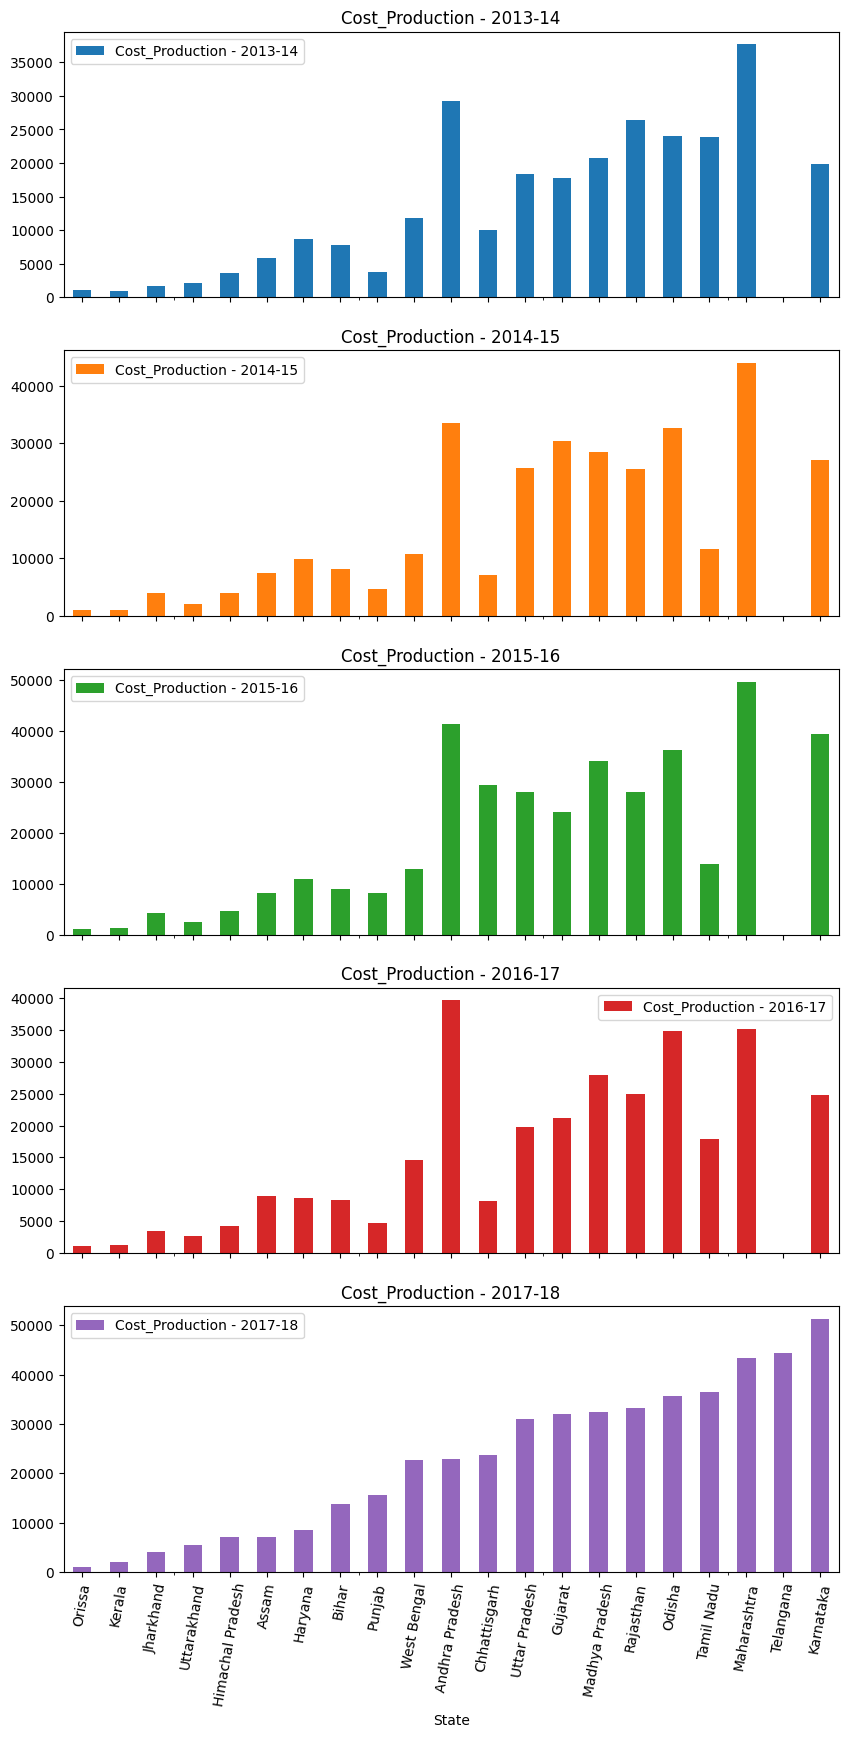

In [12]:
plt.rcParams["figure.figsize"] = (10, 20)
prod.sort_values(by = 'Cost_Production - 2017-18',inplace=True,ascending= False)
prod[::-1].plot.bar(x='State',rot=0,subplots=True)
plt.xticks(rotation = 80)
plt.show()

- The Cost of Production for Karnataka is higest in 2017 to 2018. 
- Maharashtra's Cost of Production is in 2nd position for 2013 to 2016, then in 2017-2018 Telangana is in second position and in 2016-17 Andhra Pagesh was in 2nd Position.
- The Cost of Production for Orissa and Kerala in the lowest throught out the years.

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
px.bar(prod, y= 'State',x = CP, 
        title = 'Coat of Production State Wise Over the years',orientation= 'h',height= 600)

- Over the years{2013 to 2018} Maharashtra is constantly giving high cost of Production.
- In 2018 Karnataka have the higest Cost Of Production followed by Telangana 

In [14]:
temp = data.groupby(by='Crop')[CP].sum().reset_index()
temp.sort_values(by = CP[::-1],ascending= False,inplace= True)
tp = temp.head(5)
lp = temp.tail(5)

In [15]:
px.bar(tp[::-1],CP, 'Crop', orientation= 'h',title='Top 5 Crop with higest production cost.')

-These 5 Crops have the higest cost of production.

In [16]:
px.bar(lp,CP, 'Crop', orientation= 'h',title='Top 5 Crop with lowest production cost in 2018.')

#### Crop Category

In [17]:
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [18]:
crops = data['Crop']
data['cat_crop']= data['Crop'].apply(cat_crop)

In [19]:
data.head()

,Crop,State,Cost_Production - 2013-14,Cost_Production - 2014-15,Cost_Production - 2015-16,Cost_Production - 2016-17,Cost_Production - 2017-18,cat_crop
0,Arhar,Andhra Pradesh,3354.14,4484.58,5233.87,4442.21,3695.29,None
1,Arhar,Bihar,649.35,0.00,0.00,0.00,1517.13,None
2,Arhar,Chhattisgarh,0.00,0.00,0.00,0.00,3842.54,None
3,Arhar,Gujarat,2875.65,3531.23,3171.14,2500.02,3269.03,None
4,Arhar,Karnataka,1704.49,2772.47,5017.97,1888.92,2825.77,None


In [20]:
pro = data.groupby("cat_crop")[CP].count()
pro

,Cost_Production - 2013-14,Cost_Production - 2014-15,Cost_Production - 2015-16,Cost_Production - 2016-17,Cost_Production - 2017-18
cat_crop,,,,,
Beans,7,7,7,7,7
Cereal,71,71,71,71,71
Commercial,9,9,9,9,9
Nuts,10,10,10,10,10
Pulses,43,43,43,43,43
Vegetables,15,15,15,15,15
fibres,4,4,4,4,4
oilseeds,14,14,14,14,14


In [21]:
fig = px.bar(pro,x = CP,title=" Count number of Crop per year in India ", orientation= 'h')
fig.show()

- Cereal and Pulses have the higest and second higest number of production respectively.
- Fibers have the lowest number of production.
- Beans have the 2ns lowest number of production.

#### Different proportion of Crop Categories for India

In [22]:
cata = data['cat_crop'].value_counts().reset_index()
cata.rename(columns={'index':'cat_crop','cat_crop':'count'},inplace = True)
cata

,cat_crop,count
0,Cereal,71
1,Pulses,43
2,Vegetables,15
3,oilseeds,14
4,Nuts,10
5,Commercial,9
6,Beans,7
7,fibres,4


In [23]:
px.pie(values= cata['count'],names= cata['cat_crop'] ,hole= .4)

- Cereal{71} and Pulses	{43} are the two highest portion of crop produced in india.

In [24]:
data["Crop"].unique()

array(['Arhar', 'Bajra', 'Barley', 'Cotton', 'Gram', 'Groundnut', 'Jowar',
       'Jute', 'Lentil', 'Maize', 'Moong', 'Nigerseed', 'Onion', 'Paddy',
       'Potato', 'R & M', 'Ragi', 'Safflower', 'Sesamum', 'Soyabean',
       'Sugarcane', 'Sunflower', 'Urad', 'Wheat'], dtype=object)

In [25]:
moong_df = data[data["Crop"]=="Moong"]
moong_df

,Crop,State,Cost_Production - 2013-14,Cost_Production - 2014-15,Cost_Production - 2015-16,Cost_Production - 2016-17,Cost_Production - 2017-18,cat_crop
88,Moong,Andhra Pradesh,2476.55,2814.44,6389.13,6626.39,2481.97,Pulses
89,Moong,Bihar,0.00,0.00,0.00,0.00,3655.47,Pulses
90,Moong,Gujarat,0.00,9951.42,3482.36,2753.98,6398.97,Pulses
91,Moong,Karnataka,2674.39,3994.22,4415.21,2844.70,3204.03,Pulses
92,Moong,Madhya Pradesh,0.00,0.00,0.00,0.00,4502.75,Pulses
93,Moong,Maharashtra,6590.66,6219.19,8767.69,4249.56,5027.98,Pulses
94,Moong,Odisha,3582.06,3874.28,5076.75,4804.53,3987.61,Pulses
95,Moong,Rajasthan,4534.88,3825.20,3840.28,2998.40,3802.81,Pulses
96,Moong,Tamil Nadu,3340.34,0.00,0.00,0.00,4066.57,Pulses
97,Moong,Telangana,0.00,0.00,0.00,0.00,12946.18,Pulses


In [26]:
px.bar(moong_df,'State',CP)

In [27]:
urad_df = data[data["Crop"]=="Urad"]
px.bar(moong_df,'State',CP)

In [28]:
sesamum_df = data[data["Crop"]=="Sesamum"]
px.bar(sesamum_df,'State',CP)

In [29]:
cotton_df = data[data["Crop"]=="Cotton"]
px.bar(cotton_df,'State',CP)

In [30]:
Arhar_df = data[data["Crop"]=="Arhar"]
px.bar(Arhar_df,'State',CP,title= 'Arhar Cost of Production Over the Years')

#### For Crops of Low Cost of Production

In [31]:
low_cop = lp['Crop'].to_list()
low_cop

['Barley', 'Potato', 'Onion', 'Sunflower', 'Sugarcane']

In [32]:
suger_df = data[data["Crop"]=="Sugarcane"]
px.bar(suger_df,'State',CP,title= 'Sugercane Cost of Production Over the Years')


In [33]:
potato_df = data[data["Crop"]=="Potato"]
px.bar(potato_df,'State',CP,title= 'Potato Cost of Production Over the Years')

In [34]:
onion_df = data[data["Crop"]=="Onion"]
px.bar(onion_df,'State',CP,title= 'Onion Cost of Production Over the Years')

In [35]:
sunflower_df = data[data["Crop"]=="Sunflower"]
px.bar(suger_df,'State',CP,title= 'Potato Cost of Production Over the Years')

In [36]:
Barley_df = data[data["Crop"]=="Barley"]
px.bar(Barley_df,'State',CP,title= 'Barley Cost of Production Over the Years')